# Prueba de consolidación I
### Entornos de data science con Python
## Parte 1
En esta primera parte trabajaremos con ficheros de la iniciativa de datos abiertos del Gobierno británico. Pueden consultarse aquí: https://www.data.gov.uk/dataset/broadband-coverage

Si descargamos el fichero etiquetado como csv/zip denominado "Broadband Coverage and speeds (postcode level data)" y lo descomprimimos tendremos el dataset en dos fragmentos y la descripción del mismo.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
#import bokeh

In [2]:
data1 = pd.read_table('ofcom-part1-fixed-broadband-postcode-level-data-2013.csv', sep= ',')
data2 = pd.read_table('ofcom-part2-fixed-broadband-postcode-level-data-2013.csv', sep= ',')

In [3]:
#data1.head()
#data2.head()
print len(data1) # 949.786 Registros
print len(data2) # 949.785 Registro
print (len(data1)+len(data2)) #total Registros: 1.899.571

949786
949785
1899571


In [4]:
data3 = pd.merge(data1,data2,how='outer')
#del data3

In [5]:
data3.head()
#print type(data3)
#print type(data2)
#print type(data1)

,Postcode(No Spaces),Postcode Data Status,Lines < 2Mbps(Y/N),Average Speed/Mbps,Median Speed/Mbps,Maximum Speed/Mbps,NGA Available(Y/N),Number of Connections
0,AB101AA,No premises,NaN,NaN,NaN,NaN,N,0
1,AB101AB,No premises,NaN,NaN,NaN,NaN,Y,0
2,AB101AF,No premises,NaN,NaN,NaN,NaN,N,0
3,AB101AG,No premises,NaN,NaN,NaN,NaN,N,0
4,AB101AH,No premises,NaN,NaN,NaN,NaN,N,0


In [6]:
data3.columns #conociendo el nombre de cada una de las columnas de 'data3'

Index([u'Postcode(No Spaces) ', u' Postcode Data Status ',
       u' Lines < 2Mbps(Y/N) ', u' Average Speed/Mbps ',
       u' Median Speed/Mbps ', u' Maximum Speed/Mbps', u' NGA Available(Y/N) ',
       u'Number of Connections'],
      dtype='object')

### 1.1. Lectura de datos

- Carga los datos como un DataFrame fusionando los dos ficheros en uno solo.

- Renombra la primera columna para hacerla más corta (investiga alguna función para renombrar en pandas).


In [7]:
#cambiando el nombre de la primera columna por 'Postcode' y grabandola en la variable data3
data3.rename(columns = {'Postcode(No Spaces) ' : 'Postcode'}, inplace = True)
data3.head()

,Postcode,Postcode Data Status,Lines < 2Mbps(Y/N),Average Speed/Mbps,Median Speed/Mbps,Maximum Speed/Mbps,NGA Available(Y/N),Number of Connections
0,AB101AA,No premises,NaN,NaN,NaN,NaN,N,0
1,AB101AB,No premises,NaN,NaN,NaN,NaN,Y,0
2,AB101AF,No premises,NaN,NaN,NaN,NaN,N,0
3,AB101AG,No premises,NaN,NaN,NaN,NaN,N,0
4,AB101AH,No premises,NaN,NaN,NaN,NaN,N,0


## 1.2. Limpieza de datos

- Observa los valores faltantes (¿en qué columnas están?), cuantifícalos (¿cuántos hay en cada columna?). Pista: la función np.unique() puede darnos ayuda en esto.
- Centa cuántas filas quitamos si eliminamos todas las filas con algún valor faltante, o con al menos tres valores faltantes.


In [8]:
#data3.isnull().sum
np.unique(data3[[2]], return_counts=True)

C:\Users\cgome\Anaconda2\lib\site-packages\numpy\lib\arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


(array([nan, 'N', 'Y'], dtype=object),
 array([588441, 769634, 541496], dtype=int64))

In [9]:
#Nos permite contar el numero de valores nulos por columna
data3.isnull().sum()

Postcode                       0
 Postcode Data Status          0
 Lines < 2Mbps(Y/N)       588441
 Average Speed/Mbps       588441
 Median Speed/Mbps        588441
 Maximum Speed/Mbps       588441
 NGA Available(Y/N)            0
Number of Connections          0
dtype: int64

In [10]:
# si eliminamos los valores nulos, tendremos una tabla 'data3' con 1.311.130 registros
# data3.dropna().shape #1.311.130 Registros
data3.dropna(how='any',inplace=True)

In [11]:
data3.shape

(1311130, 8)

## 1.3. Procesamiento

- Extrae las variables que refieren a la velocidad media, mediana y máxima y el código postal a una matriz de NumPy. 
El siguiente código permite convertir una de las columnas a numérico (suponemos que m es la matriz del punto anterior):

    In [20]:

    def isFloat(string):     
    try:         
       float(string)         
       return True     
    except ValueError:         
       return False 

    L = [ ] 

    for i in np.asarray(m[ : , 1]):     
       if isFloat(i):           
          L.append(float(i)) L[:10] 

    Out[20]:
    [20.0, 23.3, 17.9, 13.1, 19.6, 21.4, 18.0, 18.5, 19.8, 17.0]

- Basándote en la idea del código anterior, calcula la diferencia en valor absoluto entre la media de la velocidad y el valor 3.0  por cada código postal, utilizando arrays de NumPy. Nota: No todos los valores son convertibles, por lo que no se aplicará a todas las filas.

- Y dibuja un boxplot de la velocidad media para los datos que pueden convertirse a float con la función isFloat (ignora el resto), previamente tomando los primeros 3000 valores y partiendo el array en tres trozos, formando una matriz con tres subseries de 1000 datos cada una.


In [12]:
extrae = np.asarray(data3[['Postcode',' Average Speed/Mbps ', ' Median Speed/Mbps ', ' Maximum Speed/Mbps']])

In [13]:
extrae

array([['AB101AU', '13.6', '14.7', '20'],
       ['AB101BA', '16.2', '19.4', '23.3'],
       ['AB101BB', '11.9', '12.2', '17.9'],
       ..., 
       ['BT945PN', '2.6', '2', '5.1'],
       ['BT945PP', '>=30', '>=30', '>=30'],
       ['BT945PQ', '>=30', '>=30', '>=30']], dtype=object)

In [14]:
def isFloat(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

In [15]:
avgSpeed=[]

for i in np.asarray(extrae[:,1]):
    if isFloat(i):
        avgSpeed.append(float(i))

        
print len(avgSpeed), 'Registros' #1.175.453 Registros

1175453 Registros


In [16]:
diffAbs = []

for i in np.asarray(avgSpeed):
    diffAbs.append(abs(i - 3.0))

In [17]:
dataSpeed = pd.DataFrame({'avgSpeed':avgSpeed ,'diffAbs': diffAbs})

In [18]:
dataSpeed.head()

,avgSpeed,diffAbs
0,13.6,10.6
1,16.2,13.2
2,11.9,8.9
3,10.4,7.4
4,16.7,13.7


In [19]:
primeros = avgSpeed[0:1000]
segundos = avgSpeed[1000:2000]
terceros = avgSpeed[2000:3000]

gruposAvgSpeed = pd.DataFrame({'primeros': primeros, 'segundos':segundos, 'terceros':terceros})

In [20]:
matriz= np.matrix(gruposAvgSpeed)

(1000L, 3L)


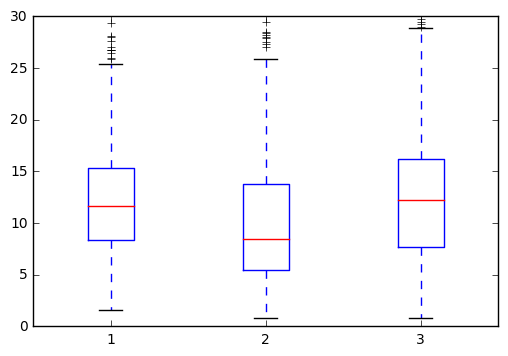

In [21]:
#gruposAvgSpeed2 = [primeros,segundos,terceros]; #haciendo una lista
#plt.boxplot(carlos);
plt.boxplot(matriz);
print matriz.shape
#print len(gruposAvgSpeed2)

## Parte 2

En esta segunda parte trabajaremos con un dataset de R que describe las características físicas de un conjunto de diamantes. Puede obtenerse de Internet.


In [22]:
diamantes = pd.read_table('diamonds.csv' , sep=',', index_col='Unnamed: 0')
diamantes.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [23]:
print 'Nombre de las columnas: ', diamantes.columns
print 'dimensiones: ',diamantes.shape

Nombre de las columnas:  Index([u'carat', u'cut', u'color', u'clarity', u'depth', u'table', u'price',
       u'x', u'y', u'z'],
      dtype='object')
dimensiones:  (53940, 10)


In [24]:
diamantes.isnull().sum() #No hay nullos

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

- Calcula los valores máximo, mínimo y medio de la variable carat.

In [25]:
print 'Maximo: ' , diamantes.carat.max()
print 'Minimo: ', diamantes.carat.min()
print 'Media: ', diamantes.carat.mean()

Maximo:  5.01
Minimo:  0.2
Media:  0.797939747868


- Dibuja su histograma y sobre el mismo gráfico, el histograma de una muestra aleatoria del mismo tamaño con puntos obtenidos de una distribución gamma con la misma media y desviación típica. Haz que la visualización sea más adecuada haciendo transparente uno de los histogramas utilizando el parámetro alpha.

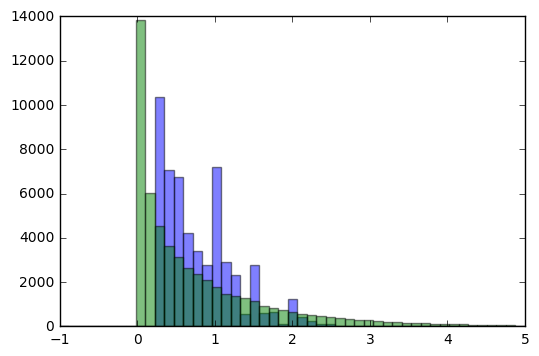

In [26]:
gamaDistri= np.random.gamma(diamantes.carat);
bins = np.linspace(-1,5,50);
plt.hist(diamantes.carat,bins,alpha = 0.5);
plt.hist(gamaDistri,bins,alpha = 0.5);
plt.show()

- Utilizando matplotlib, dibuja la nube de puntos de carat contra el precio, con ambos ejes en escala logarítmica.

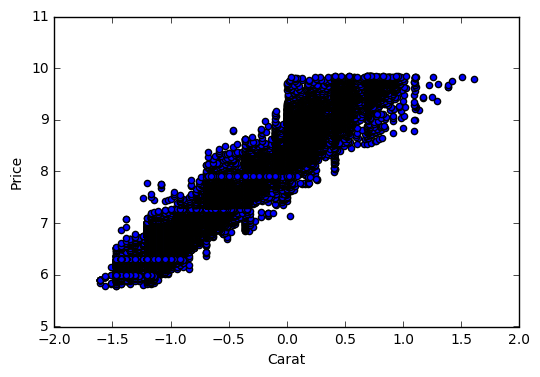

In [27]:
plt.scatter(np.log(diamantes.carat), np.log(diamantes.price));
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show;

- Ahora repite el gráfico pero utiliza solo los datos cuyo color sea "E" y su claridad sea "SI1"

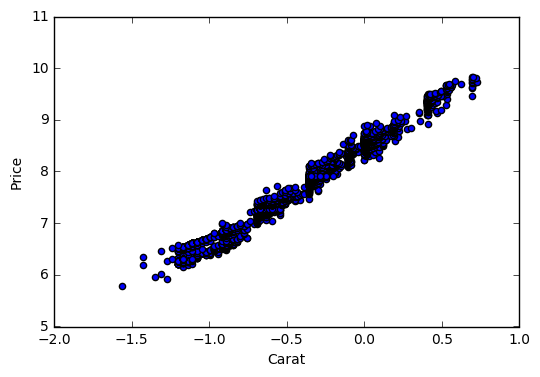

In [28]:
colorClarity = diamantes.loc[((diamantes.color == 'E') & (diamantes.clarity == "SI1" )),:]
plt.scatter(np.log(colorClarity.carat),np.log(colorClarity.price));
#plt.yscale('log');
#plt.xscale('log');
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show;

- Investiga con un gráfico la relación entre el volumen (que puedes aproximar a partir de x, y, z) y el precio, de nuevo en escala logarítmica.

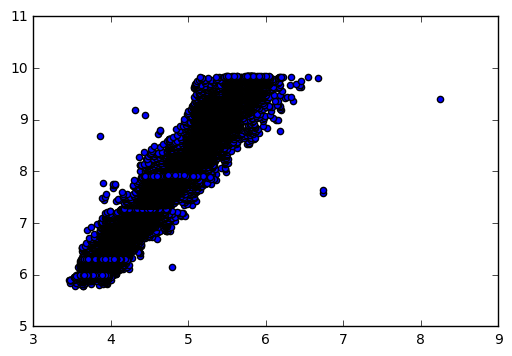

In [29]:
volumen = (diamantes.x*diamantes.y*diamantes.z).astype(float)
price = diamantes.price.astype(float)
plt.scatter(np.log(volumen), np.log(price))


- Utilizando scipy.stats, comprueba si se la relación anterior ajusta bien a un modelo de regresión lineal, tomando solo los 1000 primeros valores del dataset.

In [30]:
from scipy.stats import linregress

slope, intercept, rvalue, pvalue, stderr  = linregress(diamantes.x, diamantes.price)
print 'Pendiente: ',slope,' , ', ' Intercepto: ', intercept
print '-'
print 'R^2: ',rvalue**2,' , ',' P-Value: ', float(pvalue),' , ', ' Error Estander: ', stderr

Pendiente:  3145.41294769  ,   Intercepto:  -14094.0563771
-
R^2:  0.782225554042  ,   P-Value:  0.0  ,   Error Estander:  7.14607729965


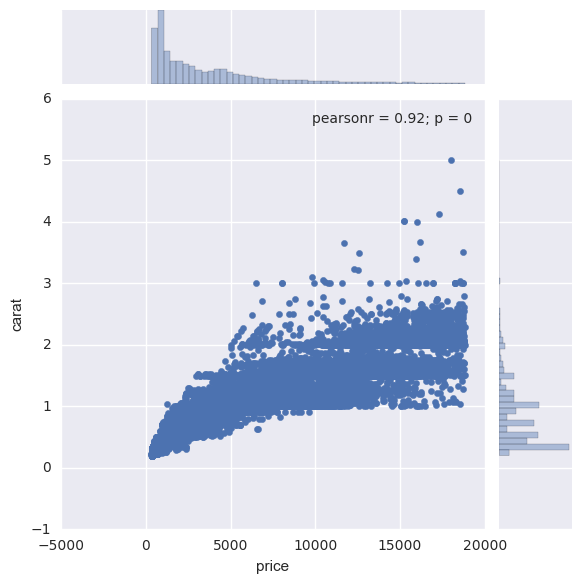

In [31]:
import seaborn as sns
cols = ['price', 'carat']
diamantes2 = diamantes[cols]
sns.jointplot(x = 'price' , y = 'carat', data = diamantes2, kind='scatter');

- Identifica con un comando los diferentes tipos de corte (cut).

In [32]:
diamantes.cut.unique() # conozco los calores unicos
#diamantes['cut'].groupby(diamantes.cut).count() # Conozco los Valores unicos y su cuenta

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

- Comprueba si hay diferencias significativas en la media del precio para los de corte "Ideal" y "Premium" y el resto, tomando 1000 valores de cada (nótese que no se puede asumir que las muestras son de una distribución normal). Puedes investigar funciones lógicas vectorizadas en NumPy como logical_or().

In [33]:
ideal = 'Ideal'
premium = 'Premium'

# variables de cada 'cut': 'Ideal', 'Premium', 'Resto'
cutIdealPremium = diamantes[((diamantes.cut == ideal)|(diamantes.cut == premium))] # 35.342 Registros
cutIdeal = diamantes[((diamantes.cut == ideal))] # 21.551 Registros
cutPremium = diamantes[(diamantes.cut == premium)] # 13.791 Registro
cutResto = diamantes[((diamantes.cut != ideal) & (diamantes.cut != premium))] # 18.598 Registros

# saca una muetra de 1000 de cada 'cut' : 'Ideal' , 'Premium' , 'Resto' otra manera
cutIdealMil = cutIdeal.head(1000)
cutPremiumMil = cutPremium.head(1000)
cutRestoMil = cutResto.head(1000)
cutIdealPremiumMil = cutIdealPremium.head(1000)

#media del precio de 'cut' de 'Ideal, 'Premium', 'Resto'
cutIdealMilPriceMean = cutIdealMil.price.mean()
cutPremiumMilPriceMean = cutPremiumMil.price.mean()
cutRestoMilPriceMean = cutRestoMil.price.mean()
cutIdealPremiumMilPriceMean = cutIdealPremiumMil.price.mean()

# Print
#print 'Precio medio Cut Ideal: ', cutIdealMilPriceMean
#print 'Precio medio Cut Premium: ', cutPremiumMilPriceMean
print 'Precio medio Cut Ideal & Premium: ', cutIdealPremiumMilPriceMean
print 'Precio medio Cut Resto: ', cutRestoMilPriceMean



Precio medio Cut Ideal & Premium:  2573.572
Precio medio Cut Resto:  2692.669


- Obtén la mediana del precio por cada valor de la claridad (clarity) y ordena los resultados de manera descendente.

In [34]:
#diamantes.price.groupby('clarity').sort_values('price',ascending = False)
cols = ['clarity','price']
diamantes[cols].groupby('clarity').median().sort_values('price',ascending = False)

,price
clarity,
SI2,4072
I1,3344
SI1,2822
VS2,2054
VS1,2005
VVS2,1311
VVS1,1093
IF,1080


## Parte 3

Podemos descargar datos de empresas del dataset Forbes2000 (paquete HSAUR) mediante get_rdataset(). Encontraremos un ranking de empresas categorizadas por sector, y con datos de su país, ventas, beneficios, recursos y valor de mercado.


In [35]:
from statsmodels import datasets
forbes2000 = datasets.get_rdataset('Forbes2000', 'HSAUR', cache=True).data
forbes2000.head()

,rank,name,country,category,sales,profits,assets,marketvalue
0,1,Citigroup,United States,Banking,94.71,17.85,1264.03,255.30
1,2,General Electric,United States,Conglomerates,134.19,15.59,626.93,328.54
2,3,American Intl Group,United States,Insurance,76.66,6.46,647.66,194.87
3,4,ExxonMobil,United States,Oil & gas operations,222.88,20.96,166.99,277.02
4,5,BP,United Kingdom,Oil & gas operations,232.57,10.27,177.57,173.54


- Seleccionar del dataframe los nombres de empresa que incluyen "elect" (sin tener en cuenta mayúsculas). Intentamos con esto obtener empresas “del sector de la electricidad” de forma aproximada. 

In [36]:
print forbes2000.columns

Index([u'rank', u'name', u'country', u'category', u'sales', u'profits',
       u'assets', u'marketvalue'],
      dtype='object')


In [37]:
forbesElect = forbes2000[forbes2000.name.apply(str.lower).str.contains('elect')]
forbesElect.head()

,rank,name,country,category,sales,profits,assets,marketvalue
1,2,General Electric,United States,Conglomerates,134.19,15.59,626.93,328.54
44,45,Samsung Electronics,South Korea,Semiconductors,50.22,5.95,54.58,72.72
71,72,Tokyo Electric Power,Japan,Utilities,41.62,1.40,116.68,30.63
151,152,Korea Electric Power,South Korea,Utilities,18.01,2.57,58.38,11.84
156,157,Kansai Electric Power,Japan,Utilities,22.12,0.68,60.52,17.56


- Utilizando como índice el país y la categoría y ordenándolo (sort_index), encontrar el valor de mercado de las empresas japonesas y estadounidenses.

In [38]:
cols = ['country','category']
paisCategoria = forbes2000.set_index(cols)
paisCategoria.sort_index(axis=0,inplace = True)
paisCategoria.head()

rank                        name  sales  profits  \
country   category                                                         
Africa    Food markets  1864  Metro Cash and Carry South   7.10     0.06   
          Insurance      950                Sanlam South   6.54    -0.07   
Australia Banking         86         Natl Australia Bank  15.34     2.69   
          Banking        126     Commonwealth Bank Group  10.75     1.36   
          Banking        149       Westpac Banking Group   9.45     1.49   

                        assets  marketvalue  
country   category                           
Africa    Food markets    1.27         0.66  
          Insurance      21.17         3.65  
Australia Banking       269.94        36.51  
          Banking       178.29        31.95  
          Banking       150.08        24.44

In [39]:
pais = ['United States', 'Japan']
#paisCategoria['marketvalue'].loc['Japan'].sum() #Martket Value = 2.091,30
#paisCategoria['marketvalue'].loc['United States'].sum() #Martket Value = 11.575,58
paisCategoria['marketvalue'].loc[pais].reset_index().groupby('country').sum() 

,marketvalue
country,
Japan,2091.30
United States,11575.58


- Sobre el mismo subconjunto de empresas eléctricas, obtener el país donde el sector de utilities tiene mayor valor de mercado medio en sus empresas.

In [40]:
cols = ['category','country']
electCountries = forbesElect[['country','category','marketvalue']]
electCountryUti = electCountries[electCountries['category']=='Utilities']
electCountryUti.groupby('country').mean().sort_values('marketvalue',ascending=False).head(1)

,marketvalue
country,
South Korea,11.84


- Volviendo al dataset original, obtener las empresas españolas.

In [47]:
forbesSpain = forbes2000[forbes2000['country']== 'Spain']
forbesSpain

,rank,name,country,category,sales,profits,assets,marketvalue
38,39,Banco Santander Central,Spain,Banking,28.70,3.28,442.24,56.78
56,57,BBVA-Banco Bilbao Vizcaya,Spain,Banking,24.10,2.81,288.80,44.67
108,109,Repsol-YPF,Spain,Oil & gas operations,29.14,2.05,39.34,26.22
114,115,Endesa Group,Spain,Utilities,20.43,1.65,57.92,21.10
188,189,Iberdrola,Spain,Utilities,11.94,1.33,30.99,18.78
378,379,Banco Popular Espaqol,Spain,Banking,3.32,0.67,44.01,14.38
408,409,Telefsnica,Spain,Telecommunications services,29.84,-5.86,60.65,86.39
462,463,Gas Natural SDG,Spain,Utilities,5.53,0.85,9.25,11.28
472,473,Altadis,Spain,Food drink & tobacco,9.45,0.46,8.66,9.48
529,530,Unisn Fenosa,Spain,Utilities,6.13,0.36,15.71,6.35


- Indexar el dataframe anterior por beneficios (profits) y obtener los nombres y rangos de las que tengan un beneficio nulo o negativo. Nota: intenta indexar de manera mixta con números (filas) y etiquetas columnas), hay una operación específica para esto en pandas.

In [63]:
cols = ['rank', 'name', 'profits']
forbesSpainV2 = forbesSpain[cols]
forbesSpainV2[forbesSpainV2['profits']<=0]

,rank,name,profits
408,409,Telefsnica,-5.86
1992,1993,Sogecable,-0.06


In [90]:
forbesSpainV2.loc[(forbesSpainV2.profits<=0)].set_index('profits')[['rank','name']]

,rank,name
profits,,
-5.86,409,Telefsnica
-0.06,1993,Sogecable
